In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 

In [2]:
df = pd.ExcelFile('/Users/guembeblessing/downloads/original_breach_new.xlsx') 

In [3]:
main_data = pd.read_excel(df, 'Main')

In [4]:
main_data.head()

,Date,State,Method,Cause,Affected_Industry,Number_of_Records,Impact
0,2009-08-12 00:00:00,VA,Unknown,vulnerability,health,83000.0,reputational
1,2009-10-12 00:00:00,CA,Hacking,vulnerability,business,596.0,societal
2,2009-11-12 00:00:00,NC,Hacking,vulnerability,health,2000.0,societal
3,2010-01-03 00:00:00,FL,Hacking,vulnerability,health,12580.0,societal
4,2010-01-04 00:00:00,AZ,Hacking,vulnerability,health,2773.0,psychological


In [5]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4126 entries, 0 to 4125
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               4126 non-null   object 
 1   State              4116 non-null   object 
 2   Method             4126 non-null   object 
 3   Cause              4126 non-null   object 
 4   Affected_Industry  4122 non-null   object 
 5   Number_of_Records  4125 non-null   float64
 6   Impact             4126 non-null   object 
dtypes: float64(1), object(6)
memory usage: 225.8+ KB


In [6]:
main_data.dtypes

Date                  object
State                 object
Method                object
Cause                 object
Affected_Industry     object
Number_of_Records    float64
Impact                object
dtype: object

In [7]:
main_data.isnull().sum() 

Date                  0
State                10
Method                0
Cause                 0
Affected_Industry     4
Number_of_Records     1
Impact                0
dtype: int64

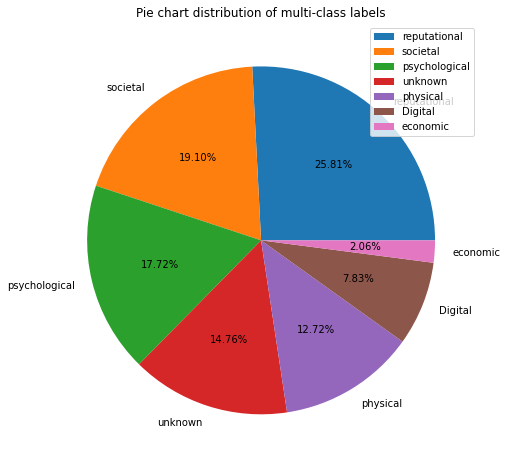

In [8]:
plt.figure(figsize=(8,8))
plt.pie(main_data.Impact.value_counts(),labels=main_data.Impact.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.show()

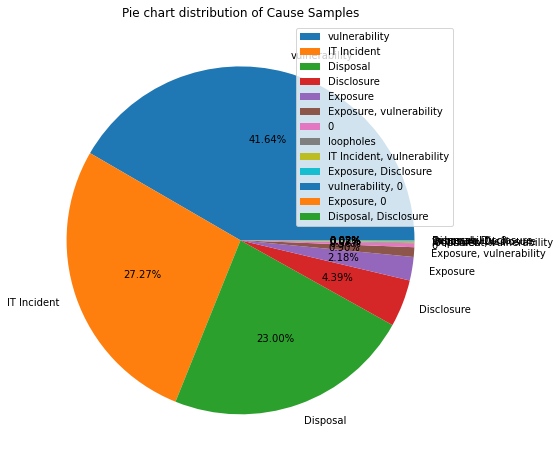

In [9]:
plt.figure(figsize=(8,8))
plt.pie(main_data.Cause.value_counts(),labels=main_data.Cause.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of Cause Samples')
plt.legend(loc='best')
plt.show()

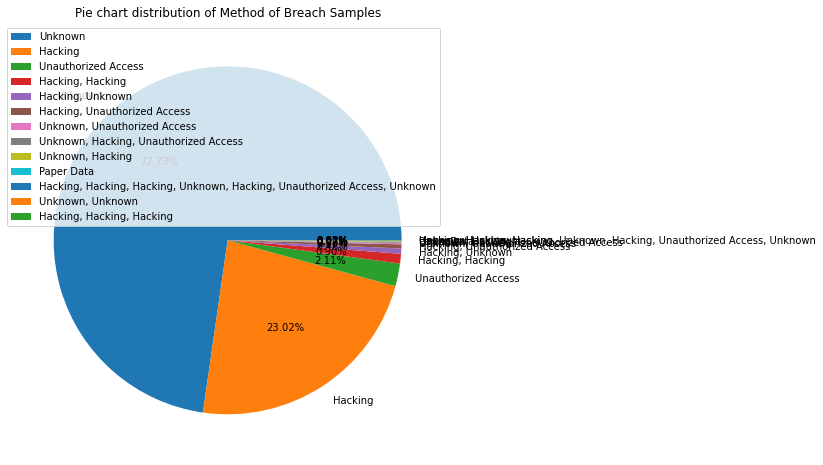

In [10]:
plt.figure(figsize=(8,8))
plt.pie(main_data.Method.value_counts(),labels=main_data.Method.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of Method of Breach Samples')
plt.legend(loc='best')
plt.show()

In [11]:
num_col = main_data.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = main_data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['Cause', 'Date', 'Impact', 'Method', 'State'], dtype='object')

In [12]:
# creating a dataframe with only categorical attributes
data_cat = main_data[cat_col].copy()
data_cat.head()

,Cause,Date,Impact,Method,State
0,vulnerability,2009-08-12 00:00:00,reputational,Unknown,VA
1,vulnerability,2009-10-12 00:00:00,societal,Hacking,CA
2,vulnerability,2009-11-12 00:00:00,societal,Hacking,NC
3,vulnerability,2010-01-03 00:00:00,societal,Hacking,FL
4,vulnerability,2010-01-04 00:00:00,psychological,Hacking,AZ


In [13]:
main_data.shape

(4126, 7)

In [14]:
# selecting numeric attributes columns from data
num_col = list(main_data.select_dtypes(include='number').columns)
num_col.remove('Number_of_Records')
print(num_col)

[]


In [15]:
main_data

,Date,State,Method,Cause,Affected_Industry,Number_of_Records,Impact
0,2009-08-12 00:00:00,VA,Unknown,vulnerability,health,83000.0,reputational
1,2009-10-12 00:00:00,CA,Hacking,vulnerability,business,596.0,societal
2,2009-11-12 00:00:00,NC,Hacking,vulnerability,health,2000.0,societal
3,2010-01-03 00:00:00,FL,Hacking,vulnerability,health,12580.0,societal
4,2010-01-04 00:00:00,AZ,Hacking,vulnerability,health,2773.0,psychological
...,...,...,...,...,...,...,...
4121,9-27-19,CA,Hacking,vulnerability,health,622.0,Digital
4122,9-27-19,OK,Hacking,vulnerability,health,500.0,Digital
4123,9-27-19,NE,Hacking,vulnerability,health,48000.0,economic
4124,9-27-19,GA,Hacking,vulnerability,health,3290.0,physical


In [16]:
multi_data = main_data.copy()
multi_label = pd.DataFrame(multi_data.Impact)

In [17]:
multi_data = pd.get_dummies(multi_data,columns=['Impact'])

In [18]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [19]:
# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['Impact'] = enc_label

In [20]:
le2.classes_

array(['Digital', 'economic', 'physical', 'psychological', 'reputational',
       'societal', 'unknown'], dtype=object)

In [21]:
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

import pickle 
from os import path

In [23]:
num_col.append('Impact')

In [24]:
num_col = list(multi_data.select_dtypes(include='number').columns)

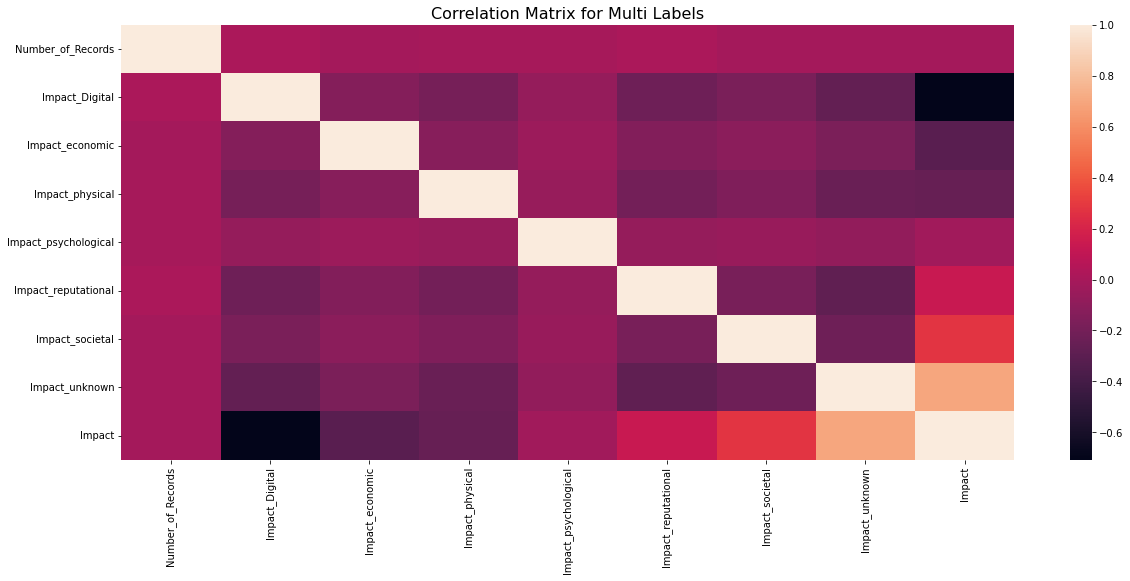

In [25]:
# Correlation Matrix for Multi-class Labels
plt.figure(figsize=(20,8))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
plt.show()

In [26]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute 
corr_ymulti = abs(corr_multi['Impact'])
highest_corr_multi = corr_ymulti[corr_ymulti >0.3]
highest_corr_multi.sort_values(ascending=True)

Impact_economic    0.312908
Impact_unknown     0.694866
Impact_Digital     0.707186
Impact             1.000000
Name: Impact, dtype: float64

In [27]:
# selecting attributes found by using pearson correlation coefficient
multi_cols = highest_corr_multi.index
multi_cols

Index(['Impact_Digital', 'Impact_economic', 'Impact_unknown', 'Impact'], dtype='object')

In [28]:
 # Multi-class labelled Dataset
multi_data = multi_data[multi_cols].copy()

In [29]:
multi_data.to_csv('/users/guembeblessing/downloads/multi_class_breachdata.csv')

In [30]:
X = multi_data.drop(columns=['Impact'],axis=1)
Y = multi_data['Impact']

In [31]:
X

,Impact_Digital,Impact_economic,Impact_unknown
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
4121,1,0,0
4122,1,0,0
4123,0,1,0
4124,0,0,0


In [32]:
Y

0       4
1       5
2       5
3       5
4       3
       ..
4121    0
4122    0
4123    1
4124    2
4125    5
Name: Impact, Length: 4126, dtype: int64

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30, random_state=100)

In [34]:
lr_multi = LinearRegression(normalize=False)
lr_multi.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = lr_multi.predict(X_test)

In [36]:
for i in range(len(y_pred)):
    y_pred[i] = int(round(y_pred[i]))

In [37]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.46365105008077545
Mean Squared Error -  0.7722132471728594
Root Mean Squared Error -  0.8787566484373586
R2 Score -  84.76475699288807
Accuracy -  69.06300484652665


In [38]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

               precision    recall  f1-score   support

      Digital       1.00      1.00      1.00       206
     economic       1.00      1.00      1.00       105
     physical       0.00      0.00      0.00       191
psychological       0.00      0.00      0.00        29
 reputational       0.38      1.00      0.55       236
     societal       0.00      0.00      0.00       163
      unknown       1.00      1.00      1.00       308

     accuracy                           0.69      1238
    macro avg       0.48      0.57      0.51      1238
 weighted avg       0.57      0.69      0.61      1238



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
lr_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_multi_df.to_csv('/users/guembeblessing/downloads/data_breach_real_pred_multi.csv')
lr_multi_df

,Actual,Predicted
1444,6,6.0
3101,6,6.0
219,0,0.0
1491,5,4.0
3168,1,1.0
...,...,...
2639,1,1.0
3284,6,6.0
2335,6,6.0
838,2,4.0


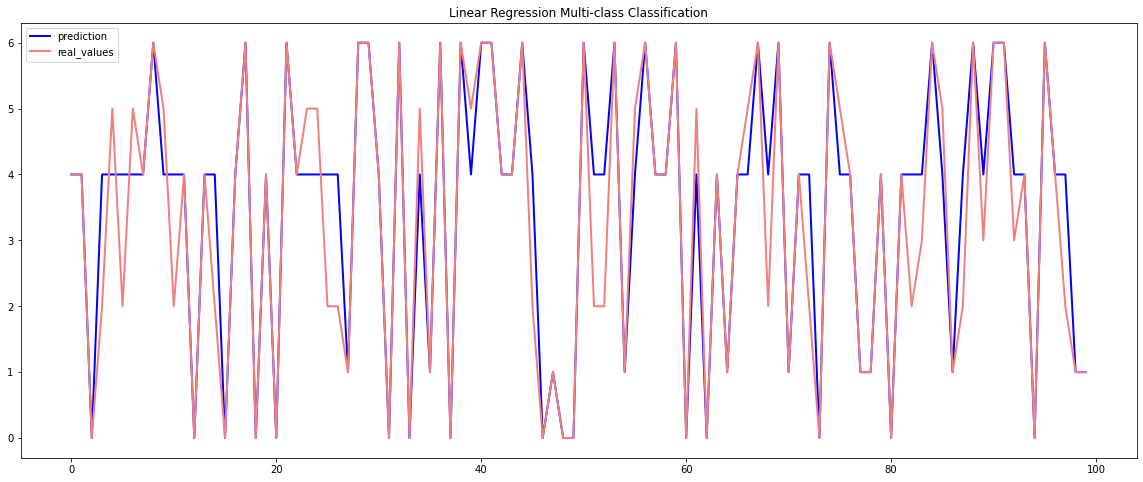

In [40]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[100:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[100:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Linear Regression Multi-class Classification")
plt.show()

In [41]:
pkl_filename = "/users/guembeblessing/downloads/data_breach_linear_regressor_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lr_multi, file)
    print("Saved model to disk")
else:
    print("Model already saved")

Model already saved


In [42]:
logr_multi = LogisticRegression(random_state=123, max_iter=5000,solver='newton-cg',multi_class='multinomial')
logr_multi.fit(X_train,y_train)

LogisticRegression(max_iter=5000, multi_class='multinomial', random_state=123,
                   solver='newton-cg')

In [43]:
y_pred = logr_multi.predict(X_test)

In [44]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.46365105008077545
Mean Squared Error -  0.7722132471728594
Root Mean Squared Error -  0.8787566484373586
R2 Score -  84.76475699288807
Accuracy -  69.06300484652665


In [45]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

               precision    recall  f1-score   support

      Digital       1.00      1.00      1.00       206
     economic       1.00      1.00      1.00       105
     physical       0.00      0.00      0.00       191
psychological       0.00      0.00      0.00        29
 reputational       0.38      1.00      0.55       236
     societal       0.00      0.00      0.00       163
      unknown       1.00      1.00      1.00       308

     accuracy                           0.69      1238
    macro avg       0.48      0.57      0.51      1238
 weighted avg       0.57      0.69      0.61      1238



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
logr_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
logr_multi_df.to_csv('/users/guembeblessing/downloads/data_breach_logisticregression_pred_multi.csv')
logr_multi_df

,Actual,Predicted
1444,6,6
3101,6,6
219,0,0
1491,5,4
3168,1,1
...,...,...
2639,1,1
3284,6,6
2335,6,6
838,2,4


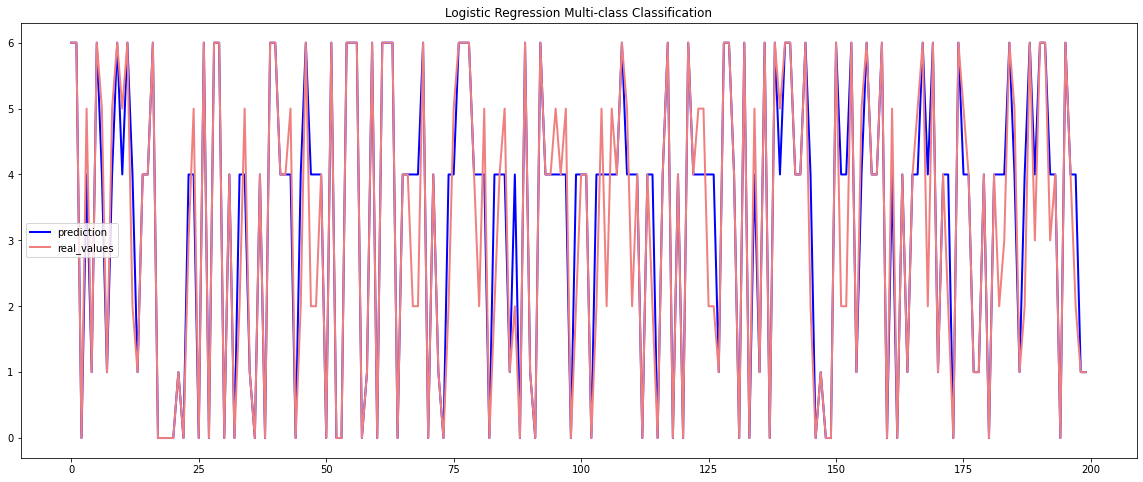

In [47]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Logistic Regression Multi-class Classification")
plt.show()

In [48]:
pkl_filename = "/users/guembeblessing/downloads/data_breach_logistic_regressor_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(logr_multi, file)
    print("Saved model to disk")
else:
    print("Model already saved")

Model already saved


In [49]:
lsvm_multi = SVC(kernel='linear',gamma='auto')
lsvm_multi.fit(X_train,y_train)

SVC(gamma='auto', kernel='linear')

In [50]:
y_pred = lsvm_multi.predict(X_test)

In [51]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.46365105008077545
Mean Squared Error -  0.7722132471728594
Root Mean Squared Error -  0.8787566484373586
R2 Score -  84.76475699288807
Accuracy -  69.06300484652665


In [52]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

               precision    recall  f1-score   support

      Digital       1.00      1.00      1.00       206
     economic       1.00      1.00      1.00       105
     physical       0.00      0.00      0.00       191
psychological       0.00      0.00      0.00        29
 reputational       0.38      1.00      0.55       236
     societal       0.00      0.00      0.00       163
      unknown       1.00      1.00      1.00       308

     accuracy                           0.69      1238
    macro avg       0.48      0.57      0.51      1238
 weighted avg       0.57      0.69      0.61      1238



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
lsvm_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lsvm_multi_df.to_csv('/users/guembeblessing/downloads/lsvm_real_pred_multi.csv')
lsvm_multi_df

,Actual,Predicted
1444,6,6
3101,6,6
219,0,0
1491,5,4
3168,1,1
...,...,...
2639,1,1
3284,6,6
2335,6,6
838,2,4


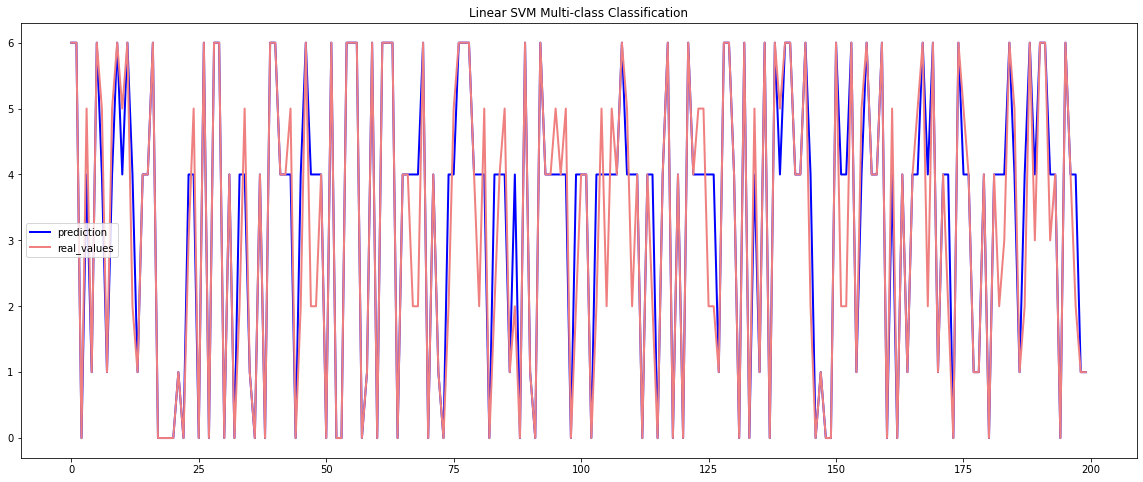

In [54]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Linear SVM Multi-class Classification")
plt.show()

In [55]:
pkl_filename = "/users/guembeblessing/downloads/lsvm_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm_multi, file)
    print("Saved model to disk")
else:
    print("Model already saved")

Model already saved
